In [33]:
import pandas as pd
import numpy as np
from datetime import date


import matplotlib.pyplot as plt

import seaborn as sns
import random

In [4]:
#reading the dataset
data = pd.read_csv('/Users/Darkenrau/2019_nCoV_data.csv')
data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [5]:
#Let's look at the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             434 non-null    int64  
 1   Province/State  349 non-null    object 
 2   Country         434 non-null    object 
 3   Last Update     434 non-null    object 
 4   Confirmed       434 non-null    float64
 5   Deaths          434 non-null    float64
 6   Recovered       434 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.9+ KB


In [6]:
#Let's convert Last Update column to datetime64 format

data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data.head()


,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


# Countries affected by the Coronavirus (2019-present)

In [7]:
countries = data['Country'].unique().tolist()

In [8]:
print(countries)
print("\n Total countries affected by Coronavirus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy']

 Total countries affected by Coronavirus:  27


# Present Condition

In [9]:
data_30 = data[data['Last Update'] > pd.Timestamp(date(2020,1,30))]
data_30.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,376,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,377,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,378,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,379,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,380,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


In [10]:
# Creating a dataframe with total number of cases for every country

cases = pd.DataFrame(data_30.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,24)
global_cases = cases[['Country','Confirmed']]
global_cases

,Country,Confirmed
1,Australia,9.0
2,Cambodia,1.0
3,Canada,3.0
4,Finland,1.0
5,France,5.0
6,Germany,4.0
7,Hong Kong,12.0
8,India,1.0
9,Italy,2.0
10,Japan,11.0


In [15]:
# A look at the different cases - confirmed, death and recovered
print ('Globaly confirmed cases:' ,data_30['Confirmed'].sum())
print ('Globaly confirmed deaths:',data_30['Deaths'].sum())
print('Globaly confirmed recovered:',data_30['Recovered'].sum())

Globaly confirmed cases: 9776.0
Globaly confirmed deaths: 213.0
Globaly confirmed recovered: 187.0


In [17]:
# Let's look the various Provinces/States affected
data_30.groupby(['Country', 'Province/State']).sum()

Sno  Confirmed  Deaths  Recovered
Country        Province/State                                     
Australia      New South Wales   426        4.0     0.0        2.0
               Queensland        428        3.0     0.0        0.0
               Victoria          427        2.0     0.0        0.0
Canada         British Columbia  423        1.0     0.0        0.0
               Ontario           422        2.0     0.0        0.0
Germany        Bavaria           429        4.0     0.0        0.0
Hong Kong      Hong Kong         405       12.0     0.0        0.0
Macau          Macau             408        7.0     0.0        0.0
Mainland China Anhui             382      237.0     0.0        3.0
               Beijing           388      121.0     1.0        5.0
               Chongqing         383      206.0     0.0        1.0
               Fujian            389      101.0     0.0        0.0
               Gansu             399       29.0     0.0        0.0
               Guangdong         378      393.0     0.0       11.0
               Guangxi           390       87.0     0.0        2.0
               Guizhou           403       15.0     0.0        1.0
               Hainan            395       50.0     1.0        1.0
               Hebei             391       82.0     1.0        0.0
               Heilongjiang      394       59.0     2.0        0.0
               Henan             379      352.0     2.0        3.0
               Hubei             376     5806.0   204.0      116.0
               Hunan             380      332.0     0.0        2.0
               Inner Mongolia    401       20.0     0.0        0.0
               Jiangsu           386      168.0     0.0        2.0
               Jiangxi           381      240.0     0.0        7.0
               Jilin             404       14.0     0.0        1.0
               Liaoning          396       45.0     0.0        1.0
               Ningxia           400       21.0     0.0        1.0
               Qinghai           407        8.0     0.0        0.0
               Shaanxi           393       87.0     0.0        0.0
               Shandong          384      178.0     0.0        2.0
               Shanghai          387      128.0     1.0        9.0
               Shanxi            397       39.0     0.0        1.0
               Sichuan           385      177.0     1.0        1.0
               Tianjin           398       32.0     0.0        0.0
               Tibet             409        1.0     0.0        0.0
               Xinjiang          402       17.0     0.0        0.0
               Yunnan            392       76.0     0.0        0.0
               Zhejiang          377      537.0     0.0        9.0
Taiwan         Taiwan            406        9.0     0.0        0.0
US             Arizona           413        1.0     0.0        0.0
               California        412        2.0     0.0        0.0
               Illinois          411        2.0     0.0        0.0
               Washington        410        1.0     0.0        0.0

In [20]:
# Provinces where deaths have taken place
data_30.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    213.0
Macau               0.0
Cambodia            0.0
Canada              0.0
Finland             0.0
Name: Deaths, dtype: float64

In [22]:
# Lets also look at the Recovered stats
data_30.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    213.0
Macau               0.0
Cambodia            0.0
Canada              0.0
Finland             0.0
Name: Deaths, dtype: float64

# China

In [24]:
#Mainland China
China = data_30[data_30['Country'] == 'Mainland China']
China

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,376,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,377,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,378,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,379,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,380,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0
380,381,Jiangxi,Mainland China,2020-01-30 21:30:00,240.0,0.0,7.0
381,382,Anhui,Mainland China,2020-01-30 21:30:00,237.0,0.0,3.0
382,383,Chongqing,Mainland China,2020-01-30 21:30:00,206.0,0.0,1.0
383,384,Shandong,Mainland China,2020-01-30 21:30:00,178.0,0.0,2.0
384,385,Sichuan,Mainland China,2020-01-30 21:30:00,177.0,1.0,1.0


# Let's look at the Confirmed vs Recovered figures of Provinces of China other than Hubei

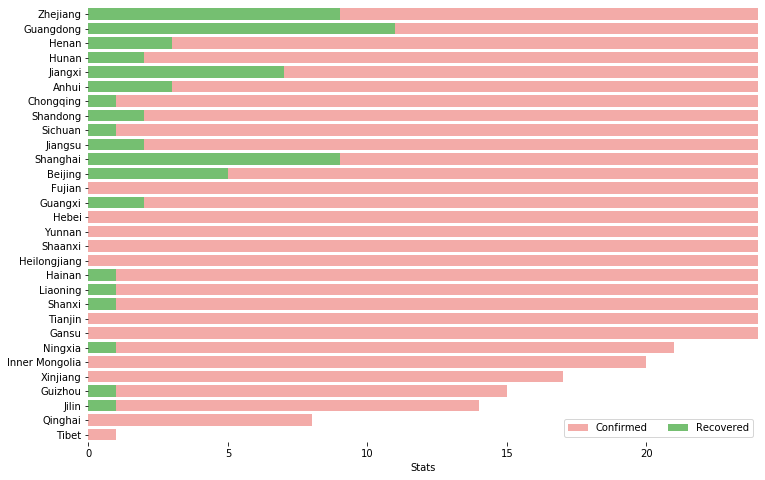

In [34]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)